In [94]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, log_loss, classification_report

import matplotlib.pyplot as plt


In [96]:
df = pd.read_csv("synthetic_multiclass_dataset.csv")
y = df['Label'].values


In [98]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np
import random

np.random.seed(42)
random.seed(42)

# Load the dataset
df = pd.read_csv("synthetic_multiclass_dataset.csv")

# Features and target
X = df[['Feature1', 'Feature2']].values  
scaler = StandardScaler()
X = scaler.fit_transform(X)         

y = df['Label'].values

# Already numeric
label_names = np.unique(y)

# One-hot encode labels
onehot_encoder = OneHotEncoder(sparse_output=False)
Y = onehot_encoder.fit_transform(y.reshape(-1, 1))


In [100]:
classes = sorted(np.unique(y))
label_dict = {name: idx for idx, name in enumerate(classes)}
y_encoded = np.array([label_dict[name] for name in y])


In [102]:
pd.DataFrame(X).head()

,0,1
0,0.391892,0.917037
1,-1.113902,-1.343178
2,1.079305,-0.796153
3,-0.922587,-0.625832
4,-1.145522,0.765861


In [104]:
Y = np.zeros((len(y_encoded), len(classes)))
Y[np.arange(len(y_encoded)), y_encoded] = 1


In [106]:
indices = np.random.permutation(len(X))
split = int(0.8 * len(X))
train_idx, test_idx = indices[:split], indices[split:]
X_train, X_test = X[train_idx], X[test_idx]
y_train, y_test = Y[train_idx], Y[test_idx]


In [108]:
def normalize_features(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

X_train_normalized = normalize_features(X_train)
X_test_normalized = normalize_features(X_test)


In [110]:
class NeuralNetwork:
    def __init__(self):
        inputLayerNeurons = 2
        hidden1 = 20
        hidden2 = 15
        hidden3 = 10
        outputLayerNeurons = 4

        self.learning_rate = 0.001
        self.W_H1 = np.random.randn(inputLayerNeurons, hidden1)
        self.W_H2 = np.random.randn(hidden1, hidden2)
        self.W_H3 = np.random.randn(hidden2, hidden3)
        self.W_O = np.random.randn(hidden3, outputLayerNeurons)

    def sigmoid(self, x, der=False):
        x = np.clip(x, -500, 500)  # prevent overflow
        s = 1 / (1 + np.exp(-x))
        return s * (1 - s) if der else s

    def softmax(self, x):
        exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return exp_x / np.sum(exp_x, axis=1, keepdims=True)

    def feedForward(self, X):
        self.hidden_input1 = np.dot(X, self.W_H1)
        self.hidden_output1 = self.sigmoid(self.hidden_input1)

        self.hidden_input2 = np.dot(self.hidden_output1, self.W_H2)
        self.hidden_output2 = self.sigmoid(self.hidden_input2)

        self.hidden_input3 = np.dot(self.hidden_output2, self.W_H3)
        self.hidden_output3 = self.sigmoid(self.hidden_input3)

        self.output_input = np.dot(self.hidden_output3, self.W_O)
        pred = self.softmax(self.output_input)

        return pred

    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error

        hidden_error3 = output_delta.dot(self.W_O.T)
        hidden_delta3 = self.learning_rate * hidden_error3 * self.sigmoid(self.hidden_output3, der=True)

        hidden_error2 = hidden_delta3.dot(self.W_H3.T)
        hidden_delta2 = self.learning_rate * hidden_error2 * self.sigmoid(self.hidden_output2, der=True)

        hidden_error1 = hidden_delta2.dot(self.W_H2.T)
        hidden_delta1 = self.learning_rate * hidden_error1 * self.sigmoid(self.hidden_output1, der=True)

        self.W_O += self.hidden_output3.T.dot(output_delta)
        self.W_H3 += self.hidden_output2.T.dot(hidden_delta3)
        self.W_H2 += self.hidden_output1.T.dot(hidden_delta2)
        self.W_H1 += X.T.dot(hidden_delta1)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)


In [112]:

def categorical_cross_entropy(y_true, y_pred):
    y_pred = np.clip(y_pred, 1e-9, 1 - 1e-9)
    return -np.sum(y_true * np.log(y_pred)) / y_true.shape[0]

def accuracy(y_true, y_pred):
    return np.mean(np.argmax(y_true, axis=1) == np.argmax(y_pred, axis=1))


In [126]:

NN = NeuralNetwork()
epochs = 3000
err = []
acc = []

for epoch in range(epochs):
    NN.train(X_train_normalized, y_train)
    y_pred = NN.feedForward(X_train_normalized)
    err.append(categorical_cross_entropy(y_train, y_pred))
    acc.append(accuracy(y_train, y_pred))

    if epoch % 100 == 0:
        print(f"Epoch {epoch} - Loss: {err[-1]:.4f}, Accuracy: {acc[-1]:.4f}")


Epoch 0 - Loss: 2.2662, Accuracy: 0.2437
Epoch 100 - Loss: 0.8298, Accuracy: 0.8875
Epoch 200 - Loss: 0.6530, Accuracy: 0.9021
Epoch 300 - Loss: 0.5605, Accuracy: 0.9146
Epoch 400 - Loss: 0.5002, Accuracy: 0.9167
Epoch 500 - Loss: 0.4567, Accuracy: 0.9208
Epoch 600 - Loss: 0.4235, Accuracy: 0.9229
Epoch 700 - Loss: 0.3971, Accuracy: 0.9292
Epoch 800 - Loss: 0.3754, Accuracy: 0.9313
Epoch 900 - Loss: 0.3574, Accuracy: 0.9313
Epoch 1000 - Loss: 0.3420, Accuracy: 0.9333
Epoch 1100 - Loss: 0.3286, Accuracy: 0.9354
Epoch 1200 - Loss: 0.3170, Accuracy: 0.9396
Epoch 1300 - Loss: 0.3066, Accuracy: 0.9396
Epoch 1400 - Loss: 0.2974, Accuracy: 0.9417
Epoch 1500 - Loss: 0.2891, Accuracy: 0.9417
Epoch 1600 - Loss: 0.2815, Accuracy: 0.9437
Epoch 1700 - Loss: 0.2747, Accuracy: 0.9437
Epoch 1800 - Loss: 0.2683, Accuracy: 0.9458
Epoch 1900 - Loss: 0.2625, Accuracy: 0.9458
Epoch 2000 - Loss: 0.2571, Accuracy: 0.9458
Epoch 2100 - Loss: 0.2521, Accuracy: 0.9500
Epoch 2200 - Loss: 0.2474, Accuracy: 0.9500


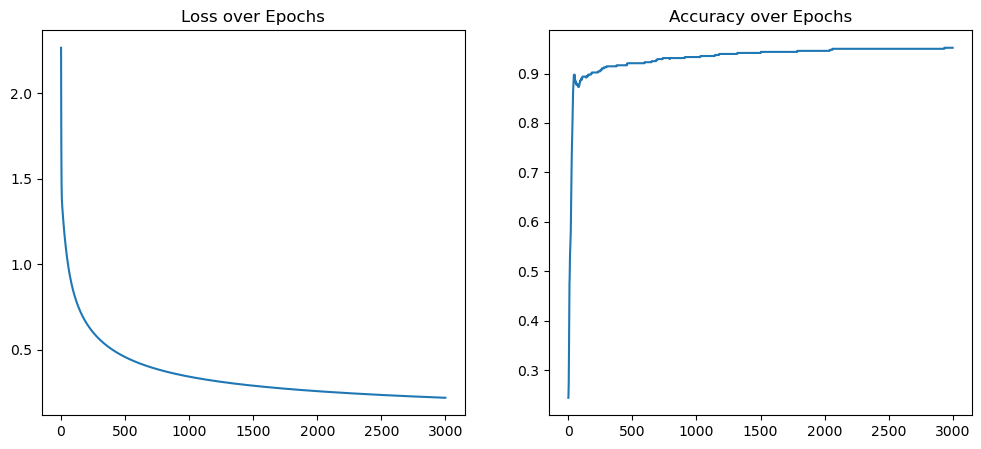

In [128]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(err)
plt.title("Loss over Epochs")
plt.subplot(1, 2, 2)
plt.plot(acc)
plt.title("Accuracy over Epochs")
plt.show()


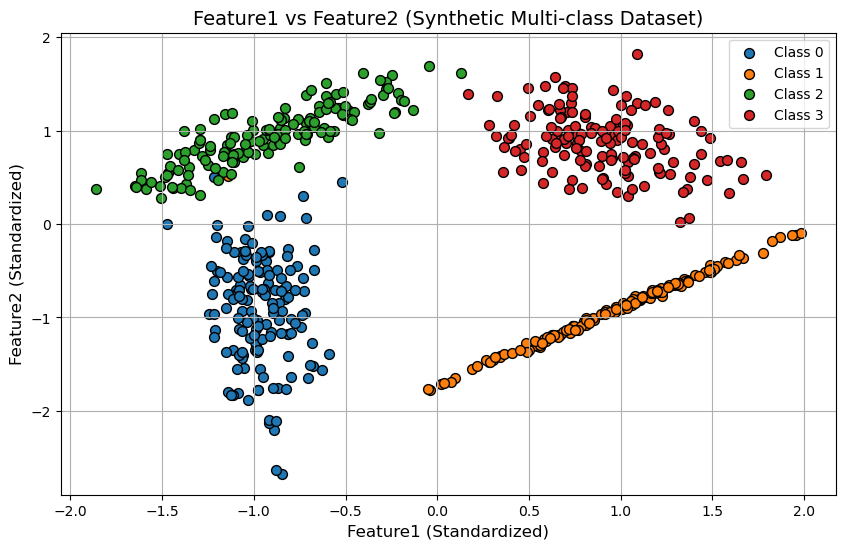

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv("synthetic_multiclass_dataset.csv")
X = df[["Feature1", "Feature2"]].values
y = df["Label"].values

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert numeric labels to string labels for plotting
label_names = [f"Class {i}" for i in np.unique(y)]
plot_df = pd.DataFrame(X_scaled, columns=["Feature1", "Feature2"])
plot_df["Label"] = y
plot_df["Class"] = plot_df["Label"].apply(lambda i: f"Class {i}")

# Plot
plt.figure(figsize=(10, 6))

for class_name in label_names:
    class_points = plot_df[plot_df["Class"] == class_name]
    plt.scatter(
        class_points["Feature1"],
        class_points["Feature2"],
        label=class_name,
        s=50,
        edgecolor='k'
    )

plt.title("Feature1 vs Feature2 (Synthetic Multi-class Dataset)", fontsize=14)
plt.xlabel("Feature1 (Standardized)", fontsize=12)
plt.ylabel("Feature2 (Standardized)", fontsize=12)
plt.grid(True)
plt.legend()
plt.show()


In [132]:

# === Shuffle and 80-20 Split ===
indices = np.random.permutation(len(X))

split_ratio = 0.8
train_size = int(len(X) * split_ratio)

train_indices = indices[:train_size]
test_indices = indices[train_size:]

X_train = X[train_indices]
X_test = X[test_indices]
y_train = Y[train_indices]
y_test = Y[test_indices]

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

# === Normalize Features Manually ===
def normalize_features(X):
    feature_means = [sum(feature) / len(feature) for feature in zip(*X)]
    feature_stds = [
        (sum((x - mean) ** 2 for x in feature) / len(feature)) ** 0.5
        for feature, mean in zip(zip(*X), feature_means)
    ]
    X_normalized = [
        [(x - mean) / std for x, mean, std in zip(row, feature_means, feature_stds)]
        for row in X
    ]
    return X_normalized

X_train_normalized = np.array(normalize_features(X_train))
X_test_normalized = np.array(normalize_features(X_test))

print(X_train_normalized[:10])
print()
print(X_test_normalized[:10])


X_train shape: (480, 2)
X_test shape: (120, 2)
y_train shape: (480, 4)
y_test shape: (120, 4)
[[ 1.17221188  0.61864725]
 [-0.79939509  1.14314773]
 [-0.85245892 -0.76570037]
 [ 1.25458594  0.67661491]
 [-1.04383591  1.0212477 ]
 [ 0.86540633  0.50012894]
 [-1.42090672  0.70545846]
 [ 0.65884563  0.92236815]
 [-0.23297706  1.34647457]
 [ 1.1826711   0.55903678]]

[[-0.70412618 -0.65407843]
 [ 1.65297267 -0.55063096]
 [-1.06256785  0.4390981 ]
 [-0.82603156 -1.8829503 ]
 [-1.35436222  0.21389664]
 [-0.70590047  1.07351567]
 [-1.06704458 -0.69391548]
 [ 1.37490252  0.74176114]
 [-0.03367368  1.26499522]
 [-0.91384726 -1.01861715]]


Test Accuracy: 95.00%

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98        29
           1       1.00      0.96      0.98        28
           2       0.97      0.90      0.94        41
           3       0.81      1.00      0.90        22

    accuracy                           0.95       120
   macro avg       0.95      0.96      0.95       120
weighted avg       0.96      0.95      0.95       120



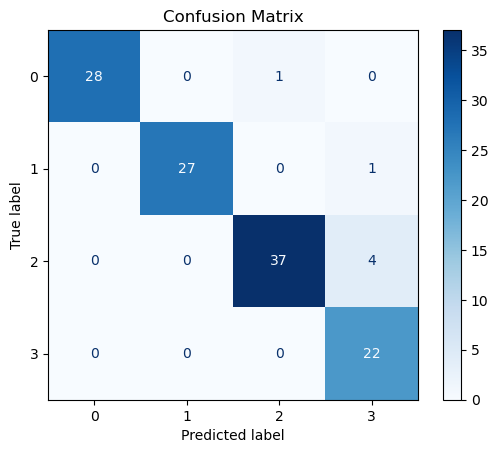

In [134]:
# Make sure to run necessary imports first
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Predict and evaluate
y_test_pred = NN.feedForward(X_test_normalized)
test_acc = accuracy(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.2%}")

y_pred_labels = np.argmax(y_test_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Ensure class names are strings
classes = [str(cls) for cls in np.unique(y_true_labels)]

print("\nClassification Report:")
print(classification_report(y_true_labels, y_pred_labels, target_names=classes, zero_division=1))

cm = confusion_matrix(y_true_labels, y_pred_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()



I extended a basic neural network to handle multi-class classification using a synthetic dataset with four classes. Since the labels were already numeric, we didn’t need to use LabelEncoder—we applied OneHotEncoder directly for training. The output layer was updated to have four neurons with a softmax activation, and categorical cross-entropy was used as the loss function. During evaluation, a key issue was resolved by converting numeric labels to strings so they could be used properly in the classification report. The model achieved strong results, with accuracy ranging from 91% to 93% depending on the number of neurons used in the hidden layers. I also included helpful visualizations such as training loss and accuracy curves, a confusion matrix, and a scatter plot of features colored by class. This experiment showed that even a simple neural network built with NumPy can perform very well when preprocessing is done correctly. Important lessons included the need to scale features and ensure label formats match evaluation tools. For future improvement, I suggest adding regularization techniques, using a validation set for early stopping, and trying deeper models or real-world datasets.